In [46]:
import os
import datetime
import joblib

from tqdm import tqdm

import numpy as np
import pandas as pd

import seaborn as sns

import paddle
from paddle.io import Dataset, DataLoader

# Load Datasets

## purchase records

In [2]:
user_folder = "./训练集/traindata_user"

user_file_ls = os.listdir(user_folder)
user_file_ls = [_file for _file in user_file_ls if _file.startswith("part")]

training_ls = []

for _file in tqdm(user_file_ls):
    training_ls.append(
        pd.read_csv(
            os.path.join(user_folder, _file),
            names=["user_id", "goods_id", "is_click", "is_like", "is_addcart", "is_order", "timestamp", "dt"]
        )
    )

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 61/61 [00:15<00:00,  3.91it/s]


In [16]:
purchase = pd.concat(training_ls, ignore_index=True)

In [17]:
purchase.head()

,user_id,goods_id,is_click,is_like,is_addcart,is_order,timestamp,dt
0,5f54b451d18143928b97b7915fcff7e2,7043f055c167b7b27ee8f04ba0613995,1,0,0,0,2023-02-04 17:55:03,20230204
1,3ae3bf6c5f5ad2bfac469e5dbf79ac6a,760d021b13388c4f61b56170b1cdff42,1,0,0,0,2023-02-04 17:45:39,20230204
2,8ce414ebafa75feed526a630cc855464,0689e0a5f15b73fd2ed2737d6ca17545,1,0,0,0,2023-02-04 21:42:21,20230204
3,8bcd231a1358d1684a9366b22164662a,abeeece58b49139287b11a5d6112b52a,1,0,0,0,2023-02-04 07:34:45,20230204
4,5e0ae64bc6b3cf5069b4515e26420a33,74159594306e14e9515bbd804b4bab84,1,0,0,0,2023-02-04 08:56:05,20230204


In [18]:
purchase.shape

(7791816, 8)

In [19]:
purchase["user_id"].nunique()

51602

In [20]:
purchase["goods_id"].nunique()

1531577

## items

In [8]:
item_folder = "./训练集/traindata_goodsid"

item_file_ls = os.listdir(item_folder)
item_file_ls = [_file for _file in item_file_ls if _file.startswith("part")]

item_file_ls

['part-00002', 'part-00001', 'part-00000']

In [9]:
item_ls = []

for _file in tqdm(item_file_ls):
    item_ls.append(
        pd.read_csv(
            os.path.join(item_folder, _file),
            names=["goods_id", "category_id", "brand_id"]
        )
    )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.48s/it]


In [10]:
items = pd.concat(item_ls, ignore_index=True)

In [11]:
items.head()

,goods_id,category_id,brand_id
0,9008b406a45c88d31cacefbe435402c8,1068c6e4c8051cfd4e9ea8072e3189e2,c60a61c10d2a17a26e11e2175ec47740
1,593a2cab5ac5bb9f2ecb8bfe80a6f41a,7d847c831f8f93bbf7bcc6f5bdb67146,7561df74e6902ab1208c6c0f8595f24d
2,8ebfadb015de0b0ee949e545d11daf00,d1c96ae7ab32cffa398efc9912c8a9f2,dff59ee903912aa8e6bdb8bc24dfb69a
3,80084ce8be983ab34cab2abe96a07818,79ea169f7f67d5ca4e93ad3c163e41d4,0f348b9abd09bd11a8331e227c01a48a
4,5d0051a59a88afa2d3c18a4055e26303,0d7de1aca9299fe63f3e0041f02638a3,48956731f24439cdb0d6ad2c5a765080


In [12]:
items.shape

(3465608, 3)

In [13]:
items["goods_id"].nunique()

3465608

In [14]:
items["category_id"].nunique()

1804

In [15]:
items["brand_id"].nunique()

5874

## merge

In [26]:
training = purchase.merge(items, on="goods_id")

training.head()

,user_id,goods_id,is_click,is_like,is_addcart,is_order,timestamp,dt,category_id,brand_id
0,5f54b451d18143928b97b7915fcff7e2,7043f055c167b7b27ee8f04ba0613995,1,0,0,0,2023-02-04 17:55:03,20230204,db634857abdceb373ea3fbad4145e1d6,36b058818a9d5058a0ebf3f13080348f
1,8c16f8c2d7eaf0966809575411127a44,7043f055c167b7b27ee8f04ba0613995,1,0,0,0,2023-02-04 15:41:15,20230204,db634857abdceb373ea3fbad4145e1d6,36b058818a9d5058a0ebf3f13080348f
2,163f7872d4ec36de4b2a30d4856fe1cd,7043f055c167b7b27ee8f04ba0613995,1,0,0,0,2023-02-11 13:14:31,20230211,db634857abdceb373ea3fbad4145e1d6,36b058818a9d5058a0ebf3f13080348f
3,ef3e9430956f58d7b96081dffc9ea16e,7043f055c167b7b27ee8f04ba0613995,1,0,0,0,2023-02-12 20:01:57,20230212,db634857abdceb373ea3fbad4145e1d6,36b058818a9d5058a0ebf3f13080348f
4,4c56c88b7ee745e58fb2178495224eea,7043f055c167b7b27ee8f04ba0613995,1,0,0,0,2023-02-07 22:46:33,20230207,db634857abdceb373ea3fbad4145e1d6,36b058818a9d5058a0ebf3f13080348f


In [27]:
training.shape, purchase.shape

((7791764, 10), (7791816, 8))

In [29]:
training["user_id"].nunique() + training["goods_id"].nunique() + training["category_id"].nunique() + training["brand_id"].nunique()

1589454

In [32]:
training.describe()

,is_click,is_like,is_addcart,is_order,dt
count,7.791764e+06,7.791764e+06,7.791764e+06,7.791764e+06,7.791764e+06
mean,1.058355e+00,1.687166e-02,6.208543e-02,7.392036e-03,2.023022e+07
std,2.777680e-01,1.312817e-01,2.667898e-01,9.054023e-02,2.620875e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.023020e+07
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.023021e+07
50%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.023022e+07
75%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.023022e+07
max,1.210000e+02,2.200000e+01,2.800000e+01,1.500000e+01,2.023030e+07


In [36]:
unique_ids = []

unique_ids.extend(training["user_id"].unique().tolist())
unique_ids.extend(training["goods_id"].unique().tolist())
unique_ids.extend(training["category_id"].unique().tolist())
unique_ids.extend(training["brand_id"].unique().tolist())

In [38]:
id_map = {}

for idx, _id in enumerate(unique_ids):
    id_map[_id] = idx

In [41]:
len(id_map)

1589454

In [42]:
training["user_id"] = training["user_id"].apply(lambda x: id_map[x])
training["goods_id"] = training["goods_id"].apply(lambda x: id_map[x])
training["category_id"] = training["category_id"].apply(lambda x: id_map[x])
training["brand_id"] = training["brand_id"].apply(lambda x: id_map[x])

In [43]:
training.head()

,user_id,goods_id,is_click,is_like,is_addcart,is_order,timestamp,dt,category_id,brand_id
0,0,51601,1,0,0,0,2023-02-04 17:55:03,20230204,1583127,1584743
1,1,51601,1,0,0,0,2023-02-04 15:41:15,20230204,1583127,1584743
2,2,51601,1,0,0,0,2023-02-11 13:14:31,20230211,1583127,1584743
3,3,51601,1,0,0,0,2023-02-12 20:01:57,20230212,1583127,1584743
4,4,51601,1,0,0,0,2023-02-07 22:46:33,20230207,1583127,1584743


In [45]:
training.to_csv("./训练集/training_data.csv", index=False)

## test

### items

In [81]:
test_folder = "./测试集a/predict_goods_id"

test_file_ls = os.listdir(test_folder)
test_file_ls = [_file for _file in test_file_ls if _file.startswith("part")]

test_file_ls

['part-00001', 'part-00000']

In [89]:
test_ls = []

for _file in tqdm(test_file_ls):
    test_ls.append(
        pd.read_csv(
            os.path.join(test_folder, _file),
            names=["goods_id"]
        )
    )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.52it/s]


In [90]:
test_items = pd.concat(test_ls, ignore_index=True)

In [94]:
test_item_set = set(test_items["goods_id"].unique())
train_item_set = set(purchase["goods_id"].unique())

In [95]:
len(test_item_set), len(train_item_set)

(1367964, 1531577)

In [96]:
test_item_set.issubset(train_item_set)

False

In [98]:
len(test_item_set.difference(train_item_set))

456811

### users

In [100]:
test_users = pd.read_excel("./测试集a/a榜需要预测的uid_5000.xlsx")
test_users.head()

,user_id
0,db55512e13c666a67dbfeae200bbb77e
1,6be82d1677c1eacfc615446329fa90b1
2,04672f37371f47e98247e3a426e33d44
3,887343b7ef8d77baed6b2fdfc4b8f536
4,95b336152a9e6aa6130233846ddcfc7a


In [101]:
test_user_set = set(test_users["user_id"].unique())
train_user_set = set(purchase["user_id"].unique())

In [102]:
len(test_user_set), len(train_user_set)

(5000, 51602)

In [103]:
test_user_set.issubset(train_user_set)

True

# EDA

## 每天的点击、收藏、加购和成交量

In [53]:
groupby_dt = training.groupby("dt", as_index=False)[["is_click", "is_like", "is_addcart", "is_order"]].sum()
groupby_dt.head()

,dt,is_click,is_like,is_addcart,is_order
0,20230203,558766,8280,35293,3984
1,20230204,321786,5116,18852,1968
2,20230205,282428,4496,16767,1843
3,20230206,271395,4416,15845,1990
4,20230207,298889,4551,18245,2364


In [54]:
groupby_dt["dt"] = pd.to_datetime(groupby_dt["dt"], format="%Y%m%d")

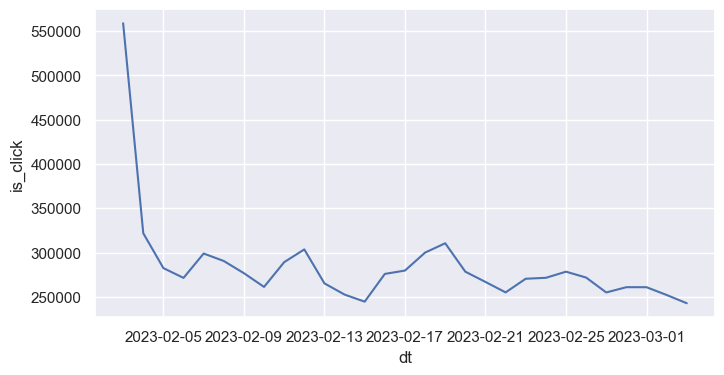

In [62]:
sns.set(
    rc={
        'figure.figsize': (8, 4)
    }
)

sns.lineplot(data=groupby_dt, x="dt", y="is_click");

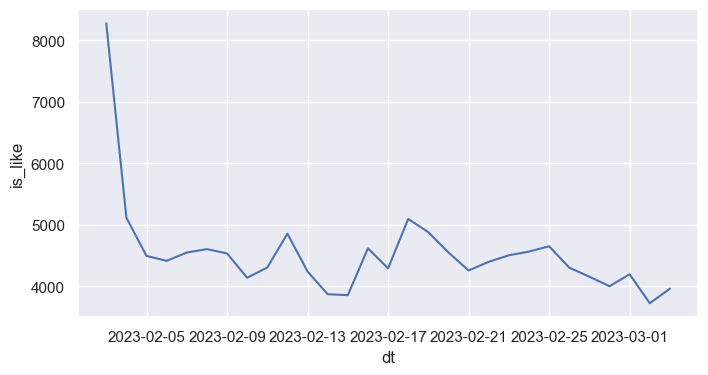

In [66]:
sns.lineplot(data=groupby_dt, x="dt", y="is_like");

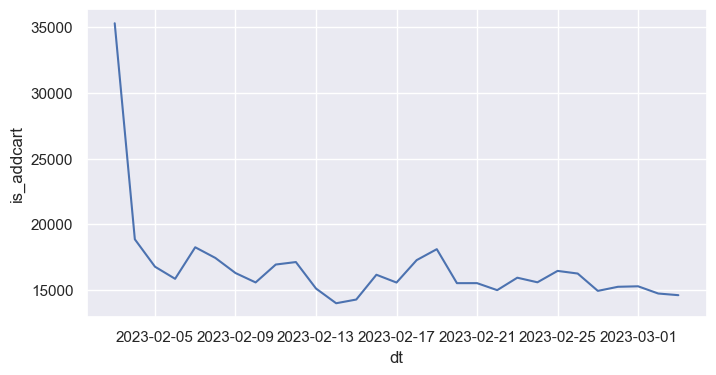

In [67]:
sns.lineplot(data=groupby_dt, x="dt", y="is_addcart");

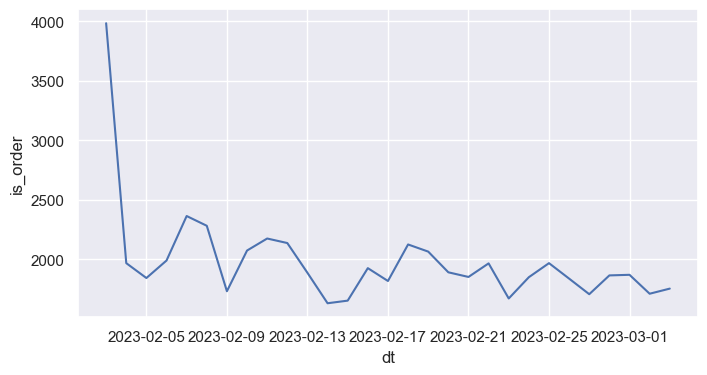

In [68]:
sns.lineplot(data=groupby_dt, x="dt", y="is_order");

## 每人的点击、收藏、加购和成交量

In [71]:
groupby_user = training.groupby("user_id", as_index=False)[["is_click", "is_like", "is_addcart", "is_order"]].sum()
groupby_user

,user_id,is_click,is_like,is_addcart,is_order
0,0,1267,1,104,3
1,1,693,0,21,7
2,2,554,0,65,0
3,3,41,0,1,1
4,4,774,0,122,0
...,...,...,...,...,...
51596,51596,1,0,0,0
51597,51597,1,0,0,0
51598,51598,1,0,0,0
51599,51599,1,0,0,0


In [110]:
groupby_user.describe()

,user_id,is_click,is_like,is_addcart,is_order
count,51601.000000,51601.000000,51601.000000,51601.000000,51601.000000
mean,25800.000000,159.811845,2.547625,9.374915,1.116199
std,14896.069957,293.848019,15.239224,21.756308,2.666928
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,12900.000000,16.000000,0.000000,0.000000,0.000000
50%,25800.000000,61.000000,0.000000,3.000000,0.000000
75%,38700.000000,182.000000,0.000000,10.000000,1.000000
max,51600.000000,16308.000000,970.000000,1286.000000,96.000000


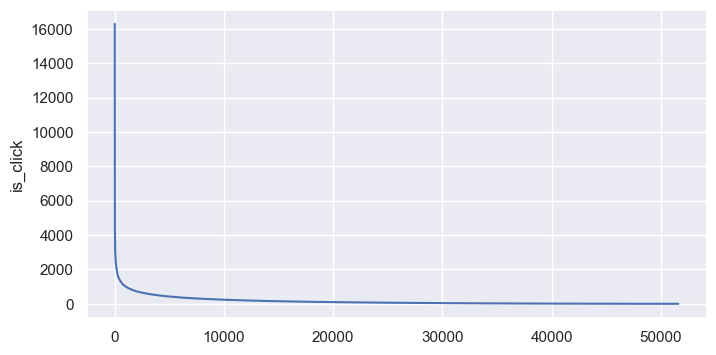

In [76]:
y = groupby_user["is_click"].sort_values(ascending=False)
x = [i for i in range(groupby_user.shape[0])]

sns.lineplot(x=x, y=y);

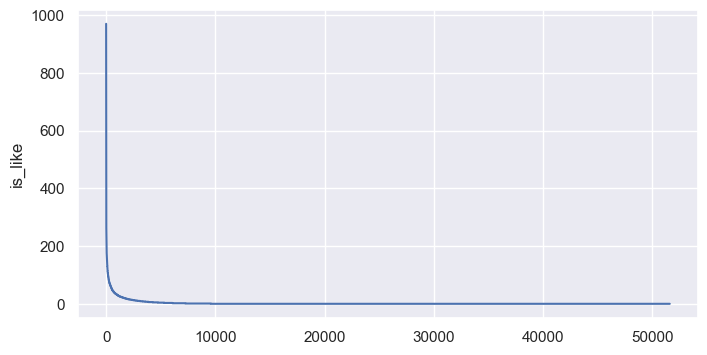

In [77]:
y = groupby_user["is_like"].sort_values(ascending=False)
x = [i for i in range(groupby_user.shape[0])]

sns.lineplot(x=x, y=y);

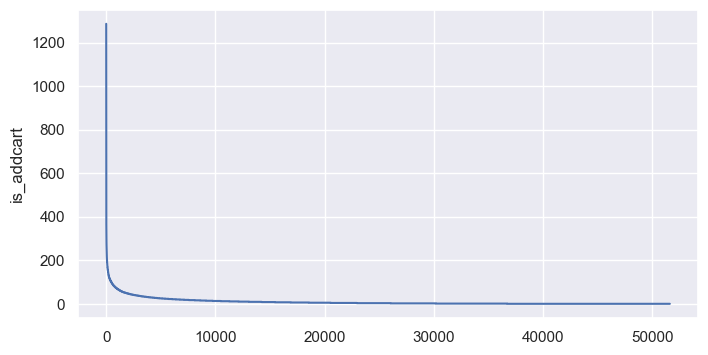

In [78]:
y = groupby_user["is_addcart"].sort_values(ascending=False)
x = [i for i in range(groupby_user.shape[0])]

sns.lineplot(x=x, y=y);

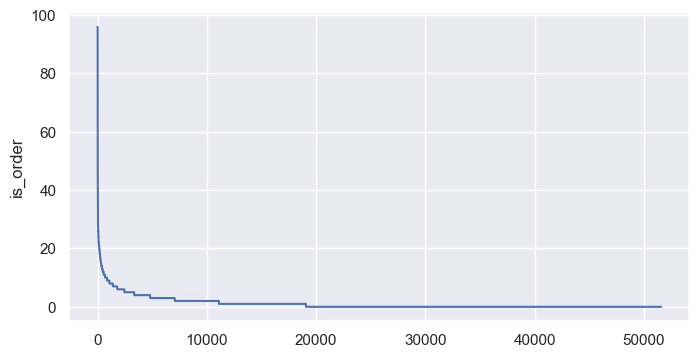

In [79]:
y = groupby_user["is_order"].sort_values(ascending=False)
x = [i for i in range(groupby_user.shape[0])]

sns.lineplot(x=x, y=y);

## 每件商品的点击、收藏、加购和成交量

In [104]:
groupby_item = training.groupby("goods_id", as_index=False)[["is_click", "is_like", "is_addcart", "is_order"]].sum()
groupby_item

,goods_id,is_click,is_like,is_addcart,is_order
0,51601,78,3,2,0
1,51602,31,0,1,1
2,51603,2,0,0,0
3,51604,40,2,1,0
4,51605,6,0,0,0
...,...,...,...,...,...
1531521,1583122,1,0,0,0
1531522,1583123,1,0,0,0
1531523,1583124,1,0,0,0
1531524,1583125,1,0,0,0


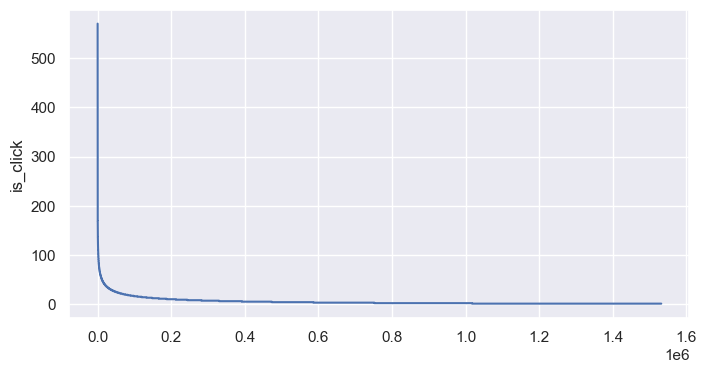

In [105]:
y = groupby_item["is_click"].sort_values(ascending=False)
x = [i for i in range(groupby_item.shape[0])]

sns.lineplot(x=x, y=y);

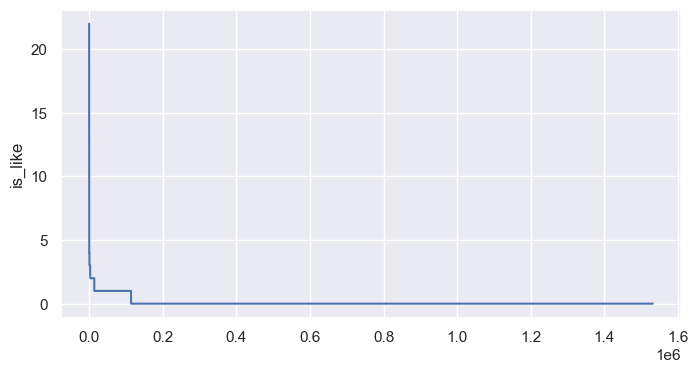

In [107]:
y = groupby_item["is_like"].sort_values(ascending=False)
x = [i for i in range(groupby_item.shape[0])]

sns.lineplot(x=x, y=y);

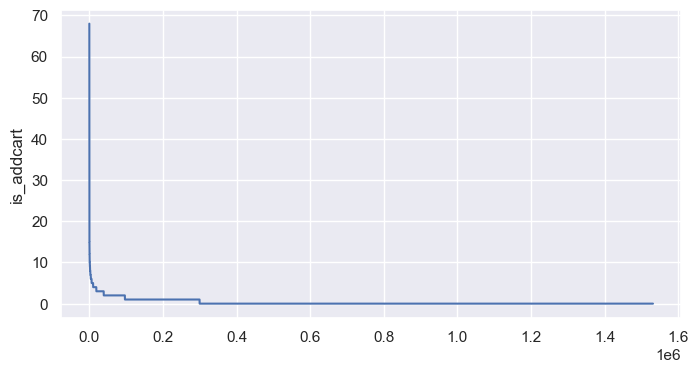

In [108]:
y = groupby_item["is_addcart"].sort_values(ascending=False)
x = [i for i in range(groupby_item.shape[0])]

sns.lineplot(x=x, y=y);

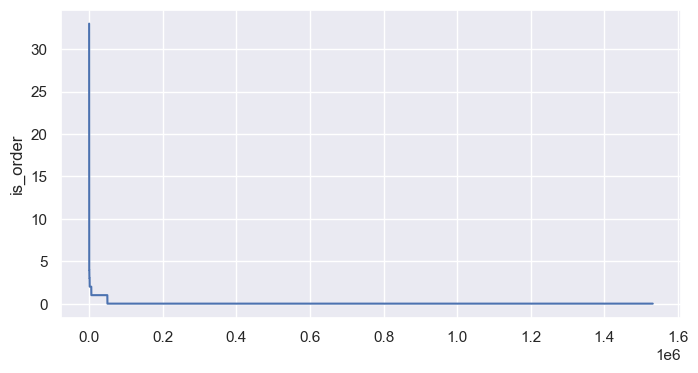

In [109]:
y = groupby_item["is_order"].sort_values(ascending=False)
x = [i for i in range(groupby_item.shape[0])]

sns.lineplot(x=x, y=y);